# Augmented Reality 
## Don’t be a random player. Control the game.

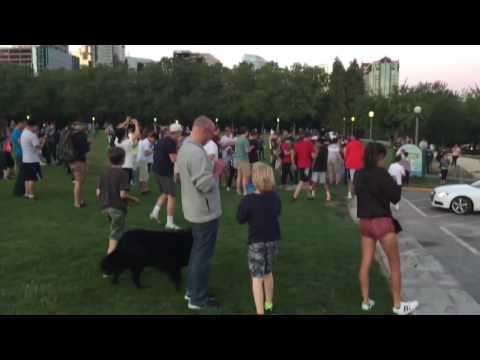

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('1sup6_R96WQ')

**Potential client**

Obsessive Compulsive Pokemon Hunter 


** What they receive?**

Classified factors of pokemon appearance. Optimal locations, weather and time to catch specific pokemon types.

** What data are you going to use for this? How will you acquire this data?**

https://www.kaggle.com/semioniy/predictemall

** Approach to solving this problem (knowing that this might change later).**

 As a beginner pokemon-go player I struggled with the randomness of pokemon sightings. I believe using historical data 
I can reveal a pattern or set of optimal factors. Using kaggle data I want to identify important factors of pokemon sightings. 

# Tableau Data Story available at:

https://public.tableau.com/profile/publish/PokomonGo/PokemonGoDataStory#!/publish-confirm

## Data Understanding

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [9]:
# Read file
file = pd.read_csv("300k.csv", dtype = 'unicode')
pnames = pd.read_csv('pokemonNumbers.csv', names = ['pokemonId', 'pokemon_name'], dtype=object)
pd.set_option('display.max_columns', 300)
df = pd.DataFrame(file)
# Add pokemon names from other file
df2 = pd.merge(df, pnames, how='left', on = "pokemonId")

What features are available in the dataset?

In [3]:
df2.columns.values

array(['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id',
       'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
       'cellId_1460m', 'cellId_2920m', 'cellId_5850m', 'appearedTimeOfDay',
       'appearedHour', 'appearedMinute', 'appearedDayOfWeek',
       'appearedDay', 'appearedMonth', 'appearedYear', 'terrainType',
       'closeToWater', 'city', 'continent', 'weather', 'temperature',
       'windSpeed', 'windBearing', 'pressure', 'weatherIcon',
       'sunriseMinutesMidnight', 'sunriseHour', 'sunriseMinute',
       'sunriseMinutesSince', 'sunsetMinutesMidnight', 'sunsetHour',
       'sunsetMinute', 'sunsetMinutesBefore', 'population_density',
       'urban', 'suburban', 'midurban', 'rural', 'gymDistanceKm',
       'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m', 'gymIn2500m',
       'gymIn5000m', 'pokestopDistanceKm', 'pokestopIn100m',
       'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m',
       'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1', '

I will focus further analysis on following features:

In [10]:
df4 = df2[['pokemonId','pokemon_name','continent','city', 'appearedLocalTime', 'terrainType',
'closeToWater', 'weather', 'temperature', 'windSpeed', 'pressure', 'population_density', 'gymDistanceKm','pokestopDistanceKm']]

In [11]:
df4.head()

,pokemonId,pokemon_name,continent,city,appearedLocalTime,terrainType,closeToWater,weather,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm
0,16,Pidgey,America,Mexico_City,2016-09-08T03:57:45,14,false,Foggy,25.5,4.79,1018.02,2431.2341,0.049869,0.081776
1,133,Eevee,America,Mexico_City,2016-09-08T03:57:37,14,false,Foggy,25.5,4.79,1018.02,2431.2341,0.259156,0.195622
2,16,Pidgey,America,New_York,2016-09-08T03:57:25,13,false,Clear,24.2,4.29,1015.29,761.8856,0.489886,0.338602
3,13,Weedle,America,Los_Angeles,2016-09-08T03:56:22,0,true,PartlyCloudy,15.6,5.84,1020.52,4842.1626,0.359309,0.109479
4,133,Eevee,America,Los_Angeles,2016-09-08T03:56:08,0,true,PartlyCloudy,15.6,5.84,1020.52,4842.1626,0.210543,0.040364


In [12]:
df4.shape

(296021, 14)

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296021 entries, 0 to 296020
Data columns (total 14 columns):
pokemonId             296021 non-null object
pokemon_name          296021 non-null object
continent             296021 non-null object
city                  296021 non-null object
appearedLocalTime     296021 non-null object
terrainType           296021 non-null object
closeToWater          296021 non-null object
weather               296021 non-null object
temperature           296021 non-null object
windSpeed             296021 non-null object
pressure              296021 non-null object
population_density    296021 non-null object
gymDistanceKm         296021 non-null object
pokestopDistanceKm    296021 non-null object
dtypes: object(14)
memory usage: 33.9+ MB


### Data Cleaning

In [15]:
# assigning correct datatype
gymDistanceKm = df4['gymDistanceKm'].astype(float)
temp = df4.temperature.astype(float)
wind = df4.windSpeed.astype(float)
pressure = df4.windSpeed.astype(float)
closetowater = df4['closeToWater'].astype(bool)
pokemon = df4['pokemon_name']

In [17]:
# dropping string values in column that should be float
pokestop = pd.to_numeric(df['pokestopDistanceKm'], errors='coerce')
pokestop.dtype

dtype('float64')

**Distance Features. Pokestop distance vs. Gym distance**

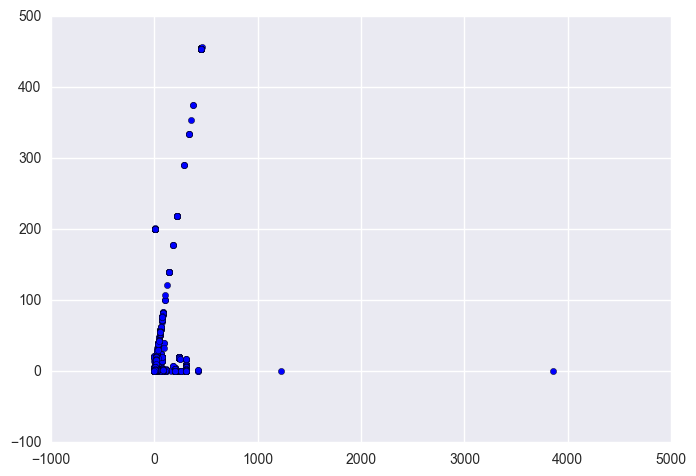

In [20]:
plt.scatter(gymDistanceKm, pokestop)
plt.show()

** Wind speed by Continents**

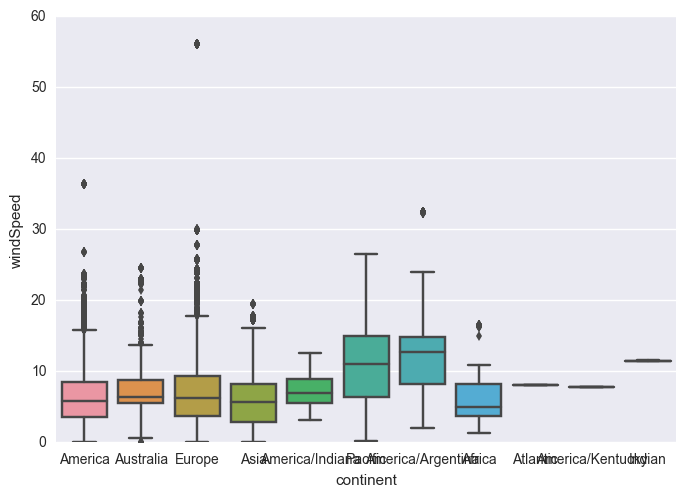

In [21]:
sns.boxplot(x ='continent', y = wind, data = df4)
plt.show()

** Temperature by Continent **

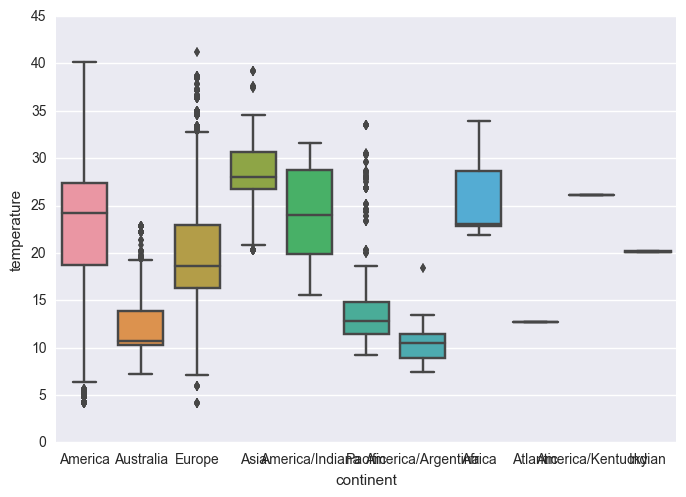

In [22]:
sns.boxplot(x = 'continent', y = temp, data = df4)
plt.show()

### Geocoding
#### Using Tableau visualization I noticed that city names are not correctly assigned to places. My plan was to find country names and correct city names using reverse gecoding tools but due to the size of this dataset it would be very time consuming as maps providers put a limit of number of queries that you can make per day. Below there is track of this excercise but without the final result

In [8]:
df5=df2.head(100)

In [6]:
from pygeocoder import Geocoder

In [ ]:
#df.apply(lambda x: some_func(a = x['a'], b = x['b'], c = x['c']))

In [42]:
df6 = df5.apply(lambda x: x[2])
df6.head
address = df5[['latitude', 'longitude']].apply(lambda x: Geocoder.reverse_geocode(float(x[0]), float(x[1])), axis=1)
df5['address']=addresss
df5

GeocoderError: Error OVER_QUERY_LIMIT
Query: https://maps.google.com/maps/api/geocode/json?language=&bounds=&latlng=32.930646%2C-84.339867&region=&sensor=false

In [12]:
df5.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,pokemon_name
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,false,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,true,true,true,false,0.049869,true,true,true,true,true,true,0.081776,true,true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,16,Pidgey
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,false,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,true,true,true,false,0.259156,false,false,true,true,true,true,0.195622,false,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,f

In [11]:
latitude = df5['latitude'].astype('float64')
longitude = df5['longitude'].astype('float64')
print( latitude, longitude)

0     20.525745
1     20.523695
2     38.903590
3     47.665903
4     47.666454
5    -31.954980
6    -31.954245
7     26.235257
8     20.525554
9     32.928558
10    32.930646
11    32.943651
12    26.235552
13    20.525770
14    26.236029
15    47.664333
16    20.526489
17    53.611417
18    20.525710
19   -31.954346
20    26.331856
21    26.235527
22    20.524085
23    32.823098
24    20.524930
25    26.235537
26    47.666999
27    32.824114
28    49.335511
29    20.525767
        ...    
70    37.796874
71    26.234066
72    34.051940
73    42.396573
74    32.823503
75    38.907171
76    35.743999
77    20.525489
78    33.312155
79    19.272688
80    26.248417
81    49.337896
82    49.337549
83    53.600939
84    49.338490
85    35.742256
86    35.743401
87    39.906041
88    34.100473
89    53.595896
90    49.146199
91    49.157947
92    38.268825
93    32.822785
94    32.822995
95     3.117061
96    35.742812
97    33.906527
98    35.742694
99    53.598550
Name: latitude, dtype: f

In [10]:
results = Geocoder.reverse_geocode(latitude, longitude)

TypeError: cannot convert the series to <class 'float'>

In [ ]:
results.city

** Most popular Pokemons**

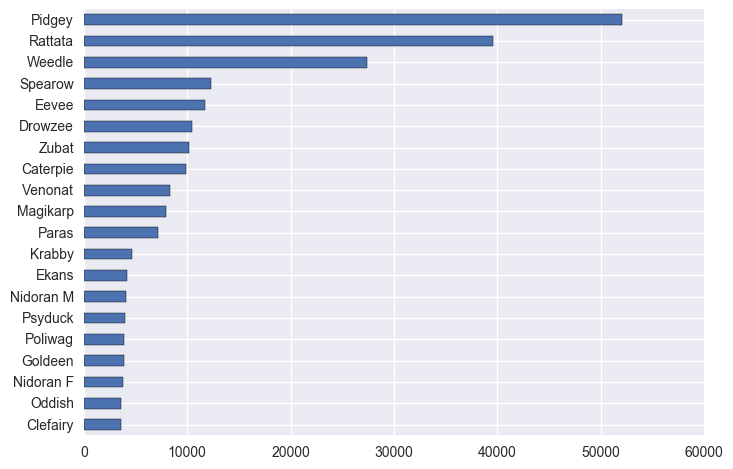

In [25]:
ptype = df4['pokemon_name'].value_counts()[:20].sort_values()

ptype.plot(kind ='barh',)
plt.show()

** 10 Least Popular Pokemons **

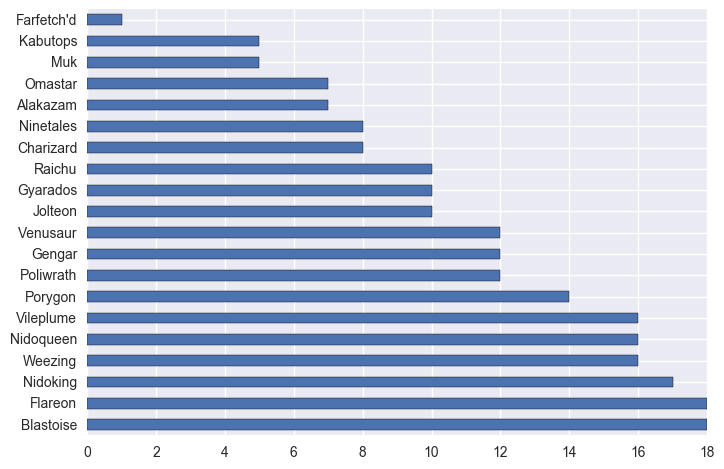

In [26]:
ptype = df4['pokemon_name'].value_counts()[-20:].sort_values(ascending = False)

ptype.plot(kind ='barh',)
plt.show()

In [27]:
ptype = df4.groupby('pokemon_name').size().sort_values(ascending = True)
ptype.head(20)

pokemon_name
Farfetch'd     1
Kabutops       5
Muk            5
Omastar        7
Alakazam       7
Charizard      8
Ninetales      8
Raichu        10
Gyarados      10
Jolteon       10
Poliwrath     12
Venusaur      12
Gengar        12
Porygon       14
Weezing       16
Nidoqueen     16
Vileplume     16
Nidoking      17
Flareon       18
Blastoise     18
dtype: int64

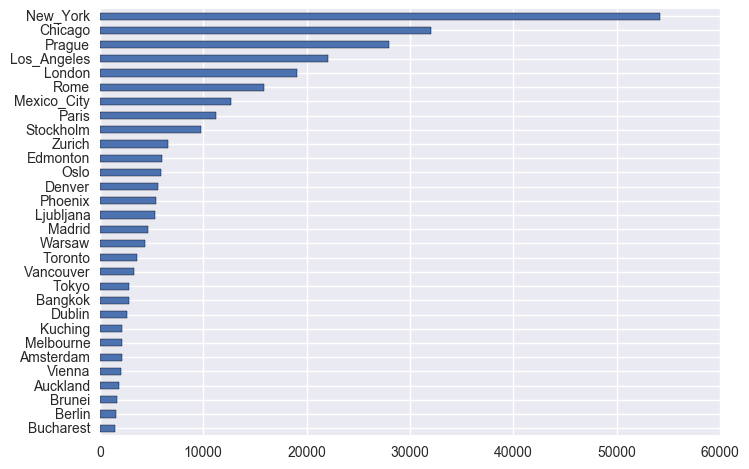

In [28]:
# Pokemon Spawns by City
pcity = df4['city'].value_counts()[:30].sort_values()
pcity.plot(kind ='barh',)
plt.show()

In [32]:
time = pd.to_datetime(df4['appearedLocalTime'])

In [34]:
df4.index = time
df4.resample('D').count()

,pokemonId,pokemon_name,continent,city,appearedLocalTime,terrainType,closeToWater,weather,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm
appearedLocalTime,,,,,,,,,,,,,,
2016-09-02,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734
2016-09-03,59960,59960,59960,59960,59960,59960,59960,59960,59960,59960,59960,59960,59960,59960
2016-09-04,56791,56791,56791,56791,56791,56791,56791,56791,56791,56791,56791,56791,56791,56791
2016-09-05,70904,70904,70904,70904,70904,70904,70904,70904,70904,70904,70904,70904,70904,70904
2016-09-06,69684,69684,69684,69684,69684,69684,69684,69684,69684,69684,69684,69684,69684,69684
2016-09-07,29213,29213,29213,29213,29213,29213,29213,29213,29213,29213,29213,29213,29213,29213
2016-09-08,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735
